In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ml2/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#ٌRequired
important: remove the 2 columns (casual and registered) from the data


first split the data into a train set and validation set (no test set)
perform EDA (on the train set) and data preparation (on the train, validation, and Kaggle's test sets)
try at least 3 Regression models
choose the best model (Evaluation metric is MSLE Mean Square Log Error) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html

(optional) use it to predict the output of Kaggle's test set and submit it to the bike-sharing competition and tell me your score

#So as required
first drop (casual and registered) because these columns not in test dataset and highly correlated with each other let's insure that

In [3]:
cor=df['casual'].corr(df['registered'])
print("multicollinearity between casual and registered:",cor)

multicollinearity between casual and registered: 0.4972496850870083


so drop it before split

In [4]:
df.drop(['casual','registered'],axis=1,inplace=True)

before doing analysis let's try regreesion model to explore the nature of features 

In [5]:
x=df.drop(['datetime','count'],axis=1)
y=df['count']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

model=LinearRegression()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(model.score(x_train, y_train)*100)
print(model.score(x_test, y_test)*100)

from sklearn.metrics import mean_squared_log_error

y_pred=np.abs(y_pred)
print('MSLE:', mean_squared_log_error(y_test, y_pred, squared=False))

25.93729419098264
26.3650998260912
MSLE: 1.3604746622839023


#let's explore

#first, split data to train and validation 

In [6]:
x=df.drop(columns=['count'],axis=1) 
y=df['count']

when using statify=y cause error bucoz in season 4 there is only one record so split data and when trying to predict add new column in test set for season 4 if useing one hot encoding 

In [7]:
df[df['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,164


In [8]:
x=df.drop(columns=['count'],axis=1) 
y=df['count']
x_train, x_val, y_train, y_val = train_test_split(x, y,test_size=0.2,random_state=42)

In [9]:
train=pd.concat([x_train,y_train],axis=1)

In [10]:
train.shape

(8708, 10)

#Bike Sharing Demand
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

#Data Fields
datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday
weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals (Dependent Variable)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 2815 to 7270
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   int64  
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   int64  
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
 9   count       8708 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 748.3+ KB


it seems that there is no null values but it's just a trick :)

categorical->season,holiday,workingday and weather

other features except date are numerical 

#duplicates check

In [12]:
train.duplicated().sum()

0

#missing values check

In [13]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

<Axes: >

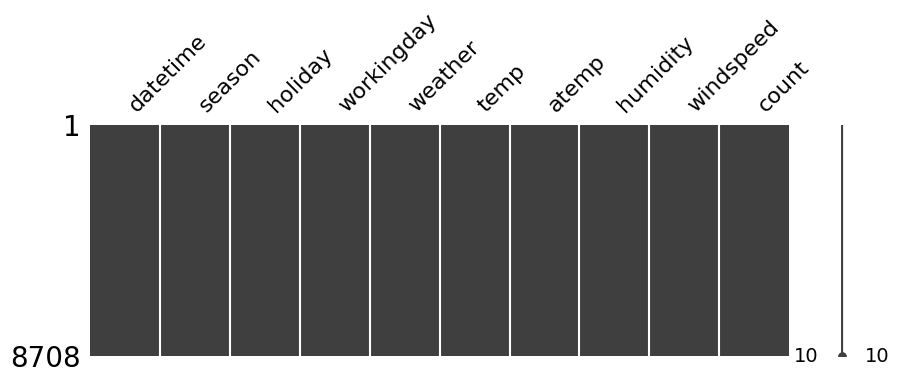

In [14]:
msno.matrix(train,figsize=(10,3))

no missing values

In [15]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.507694,0.029169,0.680983,1.416743,20.269104,23.694257,61.811438,12.795542,191.584750
std,1.115295,0.168289,0.466122,0.634073,7.788428,8.460347,19.288803,8.200255,181.010715
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,43.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,970.000000


mean is approximately the same median in temp ,atemp,humidty this means data of these columns approximately normal

 in humidity 0 may be  outlier beacause at 25% = 47

 As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers

In [16]:
train.nunique()

datetime      8708
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           60
humidity        88
windspeed       28
count          800
dtype: int64

#feature engineering

In [17]:
train.datetime = pd.to_datetime(train.datetime)
# extract date features

train['hour']=train.datetime.dt.hour
train['month']=train.datetime.dt.month
train['weekday']=train.datetime.dt.weekday
train['year']=train.datetime.dt.year
train['day']=train.datetime.dt.day
train.drop(columns=['datetime'],axis=1,inplace=True)
train.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,weekday,year,day
2815,3,0,1,1,27.88,31.820,83,6.0032,35,5,7,2,2011,6
8695,3,0,0,1,36.90,40.910,39,19.9995,450,16,8,5,2012,4
8406,3,0,1,1,32.80,35.605,41,16.9979,276,15,7,2,2012,11
1543,2,0,0,2,14.76,18.180,93,7.0015,5,4,4,6,2011,10
4952,4,0,0,1,13.12,15.150,45,16.9979,200,10,11,5,2011,19


In [18]:
train.nunique()

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       88
windspeed      28
count         800
hour           24
month          12
weekday         7
year            2
day            19
dtype: int64

#visuals
visual for every column

In [19]:
train.groupby('season')['count'].sum().reset_index() 

,season,count
0,1,252006
1,2,471346
2,3,507931
3,4,437037


<ipython-input-20-67dd519494e2>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-20-67dd519494e2>:29: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


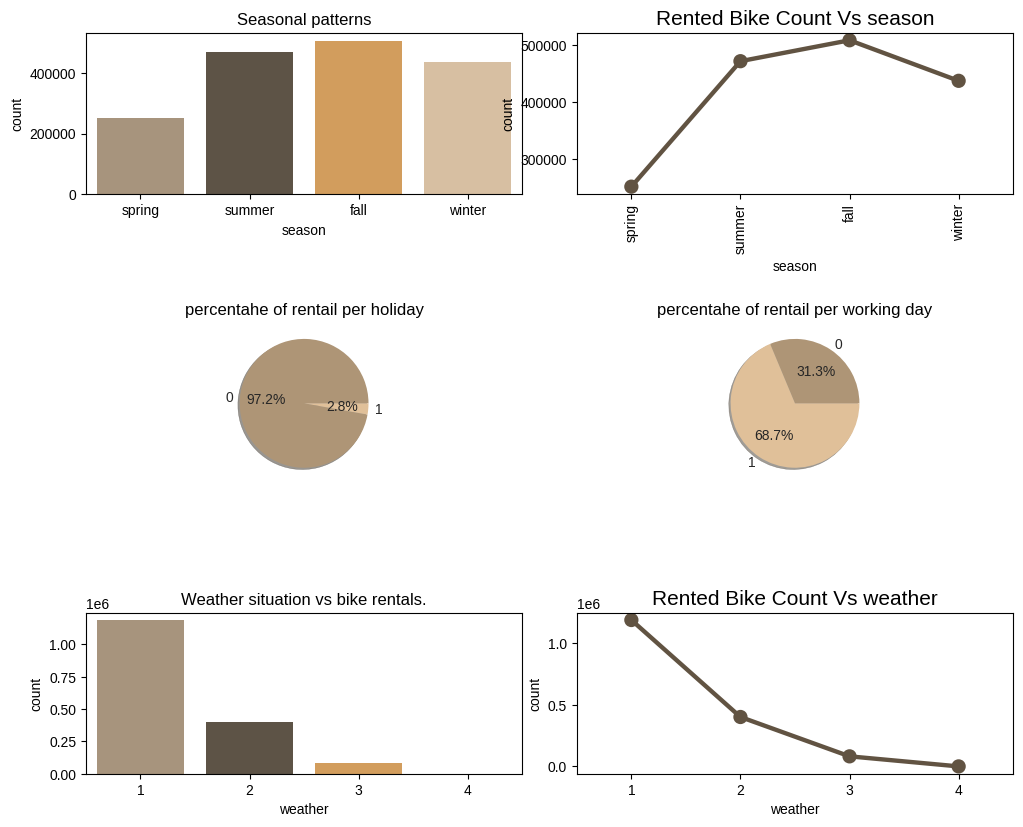

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.tight_layout() 
fig.subplots_adjust(hspace=0.8, wspace=0.125)
x_axis_labels = ['spring', 'summer', 'fall', 'winter']
colors=['#AE9576','#615342','#E69F49','#E0C099']
plt.style.use('seaborn')
counts = train.groupby('season')['count'].sum().reset_index()
ax=sns.barplot(data=counts, x="season", y="count",palette=colors,ax=axes[0,0])
ax.set(title='Seasonal patterns')
ax.set_xticklabels(x_axis_labels)
########################################################
counts = train.groupby('season')['count'].sum().reset_index()
point = sns.pointplot(data=counts, x='season', y='count',color='#615342' ,ax=axes[0,1])
point.set_title('Rented Bike Count Vs season', size=15)
# Set x-ticks rotation to 90 degrees
point.set_xticklabels(x_axis_labels, rotation=90)
########################################################
color=['#AE9576','#E0C099']
counts = train.groupby('holiday')['count'].sum()
axes[1,0].pie(counts.values, labels=counts.index, colors=color, autopct='%1.1f%%', shadow=True)
axes[1,0].set(title='percentahe of rentail per holiday')
###########################################################
counts = train.groupby('workingday')['count'].sum()
axes[1,1].pie(counts.values, labels=counts.index, colors=color, autopct='%1.1f%%', shadow=True)
axes[1,1].set(title='percentahe of rentail per working day')
###########################################################

colors=['#AE9576','#615342','#E69F49','#E0C099']
plt.style.use('seaborn')
counts = train.groupby('weather')['count'].sum().reset_index()
ax=sns.barplot(data=counts, x="weather", y="count",palette=colors,ax=axes[2,0])

ax.set(title='Weather situation vs bike rentals.')
##################################################################
x_axis_labels=[1,2,3,4]
counts = train.groupby('weather')['count'].sum().reset_index()
point = sns.pointplot(data=counts, x='weather', y='count',color='#615342' ,ax=axes[2,1])
point.set_title('Rented Bike Count Vs weather', size=15)
# Set x-ticks rotation to 90 degrees
point.set_xticklabels(x_axis_labels)
plt.show()

In [21]:
train['holiday'].value_counts()

0    8454
1     254
Name: holiday, dtype: int64

The season chart shows that autumn has the highest rental rate, Therefore June, July and August has got relatively higher demand for bicycle, and on non-holiday days, 97% of rentals occur.
Dataset has more records of No holiday than a holiday which is obvious as most of the days are working days.

68.5% of rentals occurs in working day 

The highest occurrence of rentals takes place when the weather conditions are classified as "condition one."

 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 and we no from previous explanation the condition 4 has only one record 

<Axes: xlabel='day', ylabel='count'>

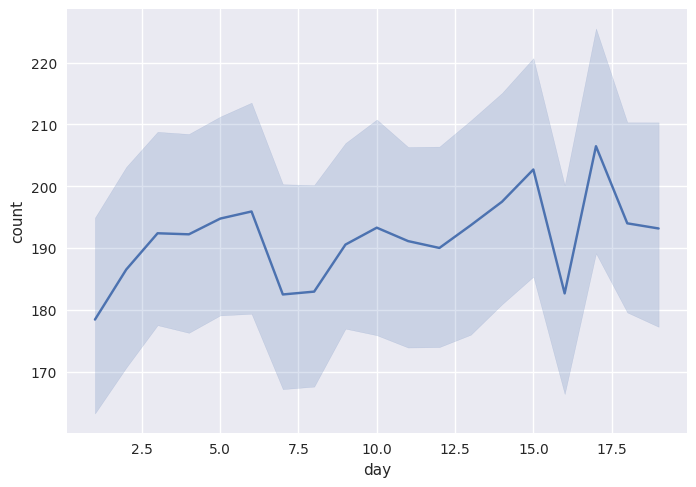

In [22]:
#Bike Rentals per day
sns.set_style('darkgrid')
counts = train.groupby('day')['count'].sum().reset_index()
sns.lineplot(x='day', y='count', data=train)

there was decreasing in rentals from 15th to 16th of month


<Axes: xlabel='month', ylabel='count'>

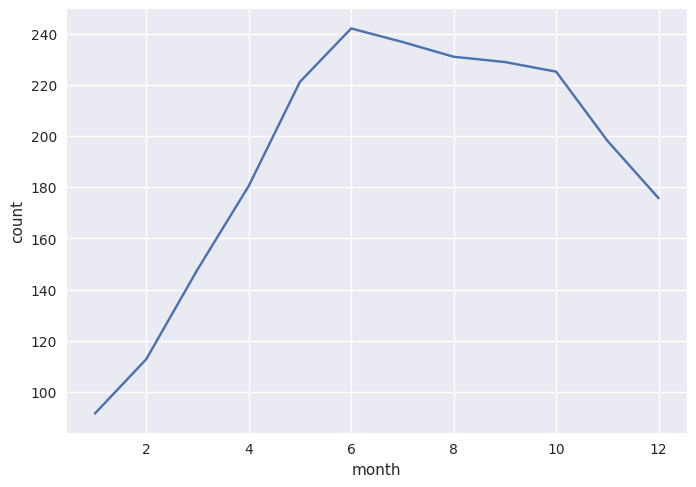

In [23]:
#Avg count by month
avg_count_by_month = train.groupby('month')['count'].mean().reset_index()
sns.set_style('darkgrid')
sns.lineplot(x='month', y='count', data=avg_count_by_month)

when comparing monthly demand, it is confirmed that the amount of loans during the fall period is the highest, and among them, the amount of loans during the period between summer and autumn is the highest.it seems that people like rentaling in summer 

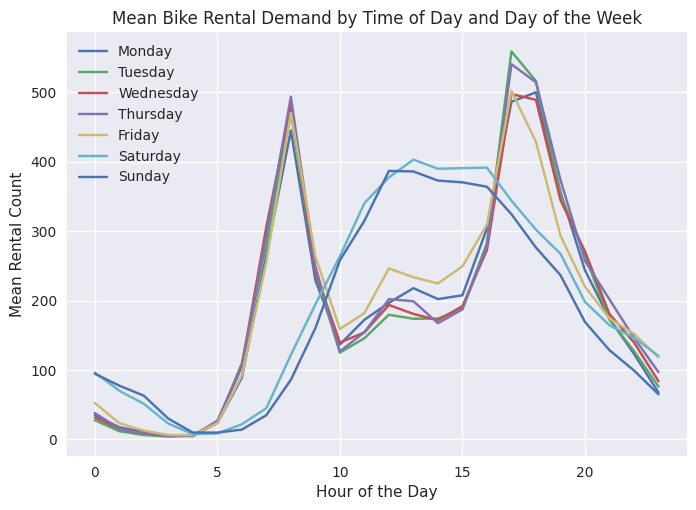

In [24]:
#Bike rental demand may also vary by time of day and day of the week.

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

rental_counts = train.groupby(['weekday', 'hour'])['count'].mean().reset_index()

rental_counts_pivoted = rental_counts.pivot(index='hour', columns='weekday', values='count')
rental_counts_pivoted.plot.line()

plt.title('Mean Bike Rental Demand by Time of Day and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Rental Count')

plt.legend(labels=days)
plt.show()

On weekdays especially in working days , more people tend to rent bicycle around 7AM-8AM and 5PM-6PM.  this can be attributed to regular school and office commuters.

in wirking days 
High       : 7-9 and 17-19 hours
Average  : 10-16 hours
Low         : 0-6 and 20-24 hours

The visualization analysis of the data on working days and holidays shows that there is a clear difference in bicycle loan amount between working days and holidays.
As mentioned earlier, the amount of bicycle loans increased sharply during rush hour and rush hour on working days, but on the contrary, on holidays, it recorded a high amount of bicycle loans at 1 p.m.

Text(0.5, 1.0, 'Percentage of Rentals by Year')

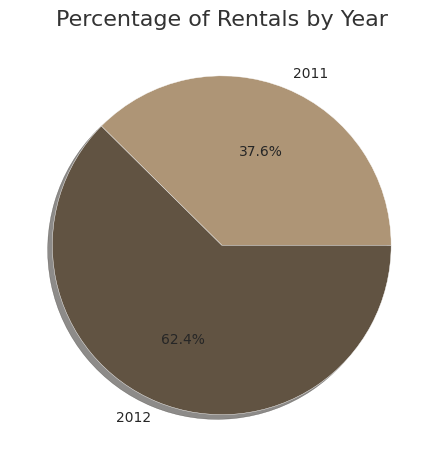

In [25]:
#percentage of rental in every year
color=['#AE9576','#E0C099']
counts = train.groupby('year')['count'].sum()
fig, ax = plt.subplots()
ax.pie(counts.values, labels=counts.index, colors=colors, autopct='%1.1f%%', shadow=True)
ax.set_title('Percentage of Rentals by Year', color='#333333', fontsize=16)


In [26]:
train.groupby('year')['count'].sum()

year
2011     627028
2012    1041292
Name: count, dtype: int64

it is confirmed that the usage rate of bicycle rental increased  from  632096 in 2011 to 1029874 in 2012.

<ipython-input-27-788f8b3e6ccd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['temp'], kde=True, color='#262223', ax=axes[0,0])
<ipython-input-27-788f8b3e6ccd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['atemp'], kde=True, color='#262223', ax=axes[0,1])
<ipython-input-27-788

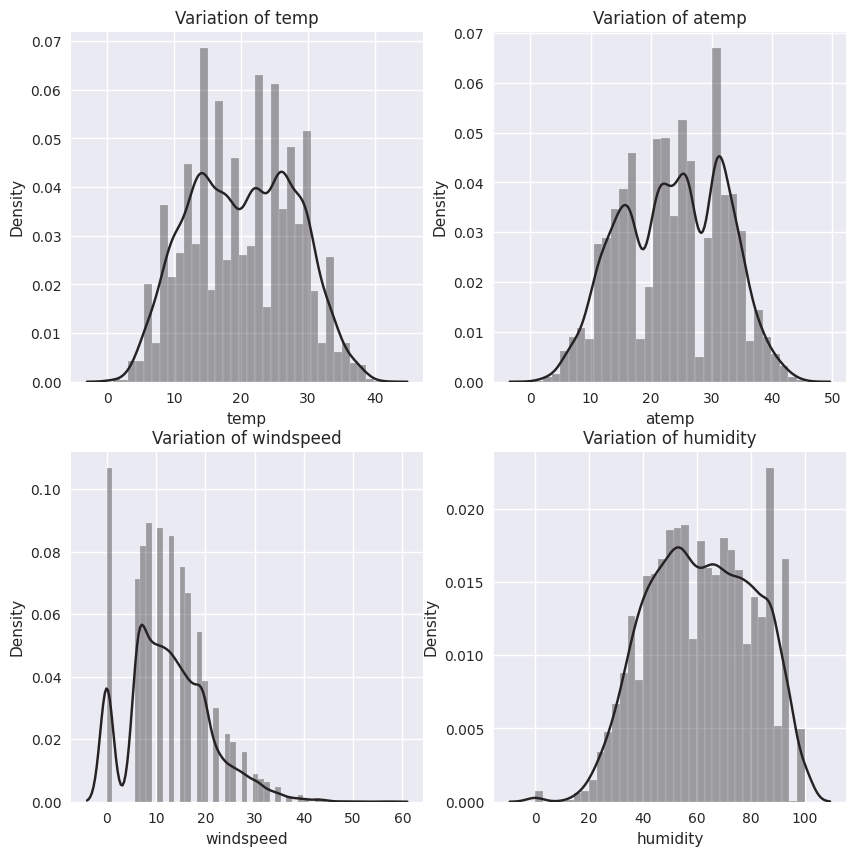

In [27]:
fig,axes=plt.subplots(2,2)
sns.distplot(train['temp'], kde=True, color='#262223', ax=axes[0,0])
axes[0,0].set_title("Variation of temp")
sns.distplot(train['atemp'], kde=True, color='#262223', ax=axes[0,1])
axes[0,1].set_title("Variation of atemp")
sns.distplot(train['windspeed'], kde=True, color='#262223', ax=axes[1,0])
axes[1,0].set_title("Variation of windspeed")
sns.distplot(train['humidity'], kde=True, color='#262223', ax=axes[1,1])
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)
plt.show()

<ipython-input-28-d324b1c3651d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


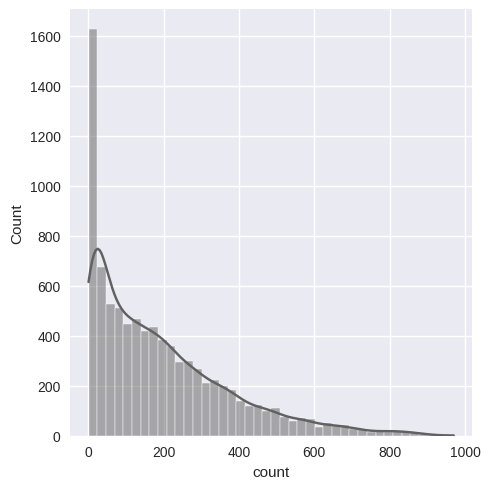

In [28]:
plt.style.use('seaborn')
sns.displot(data=train,x='count',color ='#616161'
            ,kde = True)
plt.show()

temp and atemp is approxmatly normal

humidity tend to be normal,

0s may be outliers

right skewed and 0 may be outlier

Distribution of Rented Bike Count is positively skewed and has many outliers.

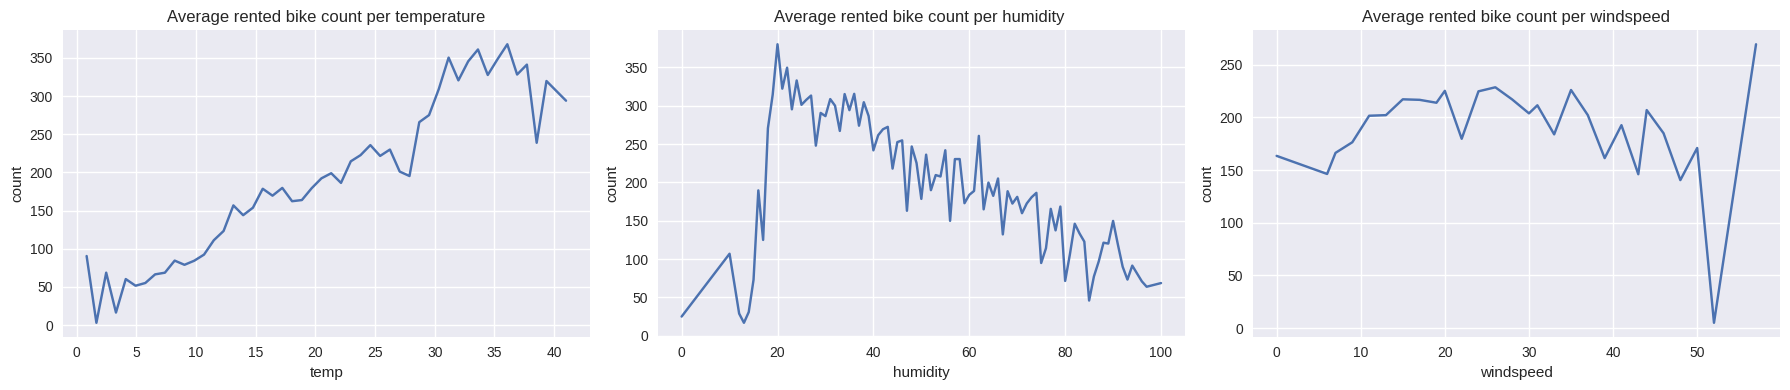

In [29]:
fig,ax = plt.subplots(1,3, figsize=(18,4))
# Multi-variate analysis

temp_wrt_bike_rent_count = train.groupby(['temp'])['count'].mean().reset_index()

line = sns.lineplot(x = 'temp', y ='count', data = temp_wrt_bike_rent_count, ax = ax[0])
line.set_title('Average rented bike count per temperature')

temp_wrt_bike_rent_count = train.groupby(['humidity'])['count'].mean().reset_index()

line = sns.lineplot(x = 'humidity', y ='count', data = temp_wrt_bike_rent_count, ax = ax[1])
line.set_title('Average rented bike count per humidity ')

temp_wrt_bike_rent_count = train.groupby(['windspeed'])['count'].mean().reset_index()

line = sns.lineplot(x = 'windspeed', y ='count', data = temp_wrt_bike_rent_count, ax = ax[2])
line.set_title('Average rented bike count per windspeed')

plt.tight_layout()
plt.show()

We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature.

For the number of rented bikes in demand, the most preferred humid environment is 20-70.

Line plot tells us that people prefer moderate wind but there is a spike at wind speed 7.

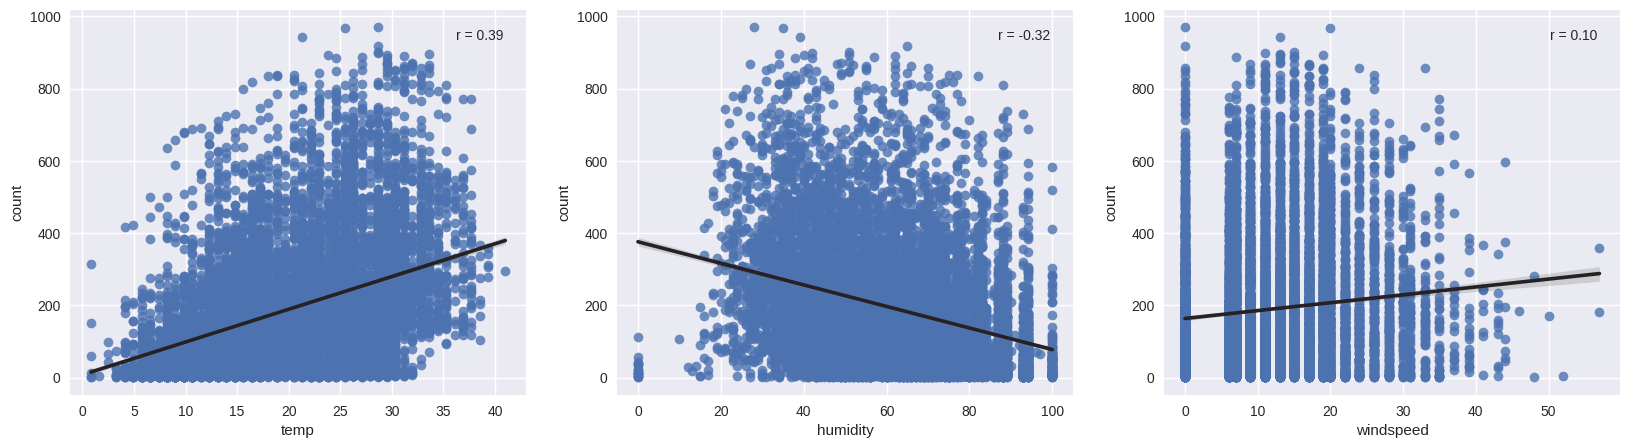

In [30]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

variables = ['temp', 'humidity', 'windspeed']

for var, ax in zip(variables, axes):
    corr_coef = np.corrcoef(train[var], train['count'])[0, 1]
    sns.regplot(x=var, y='count', data=train, ax=ax, line_kws={"color":"#262223"})
    ax.text(0.95, 0.95, f"r = {corr_coef:.2f}", transform=ax.transAxes, ha='right', va='top')


negative relationship between humdity and count, higher humidity will cause to lower the demand and vice versa.

temp is better

People prefer renting bikes in warm environments. Therefore, the demand for bicycles is high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.

#outliers 
from histogram of numerical variables ,Some of the variables can get a normal distribution when outliers are removed. First, we will get rid of outliers, and then we check to see if we need to use the transformation technique again.

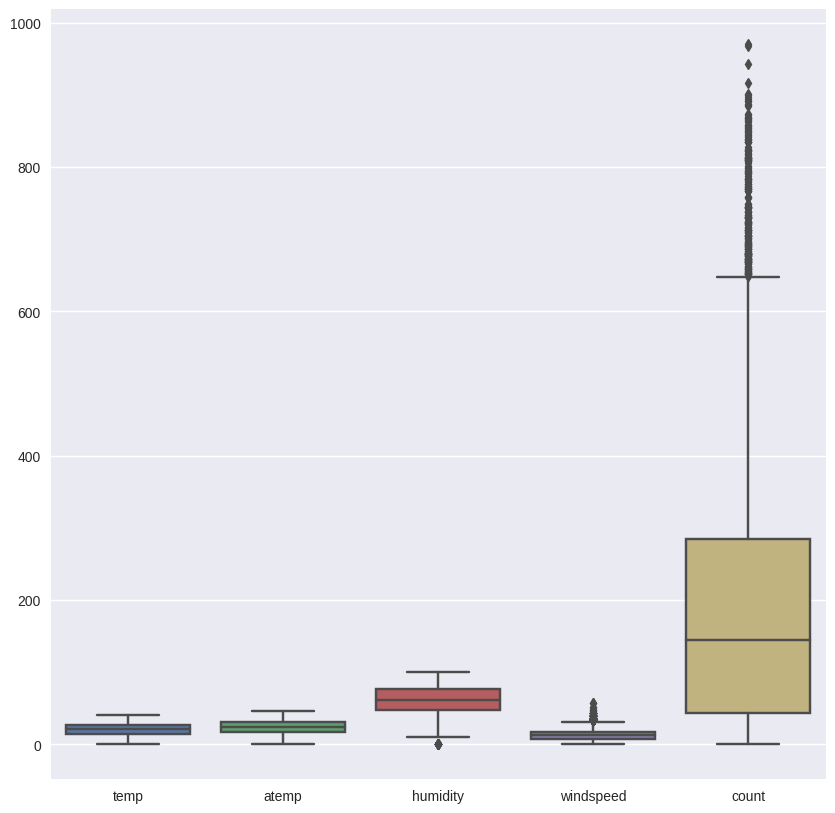

In [31]:
sns.boxplot(data=train[['temp',
       'atemp', 'humidity', 'windspeed', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

as we said previous 0s in humidity are outliers

<Axes: xlabel='workingday', ylabel='count'>

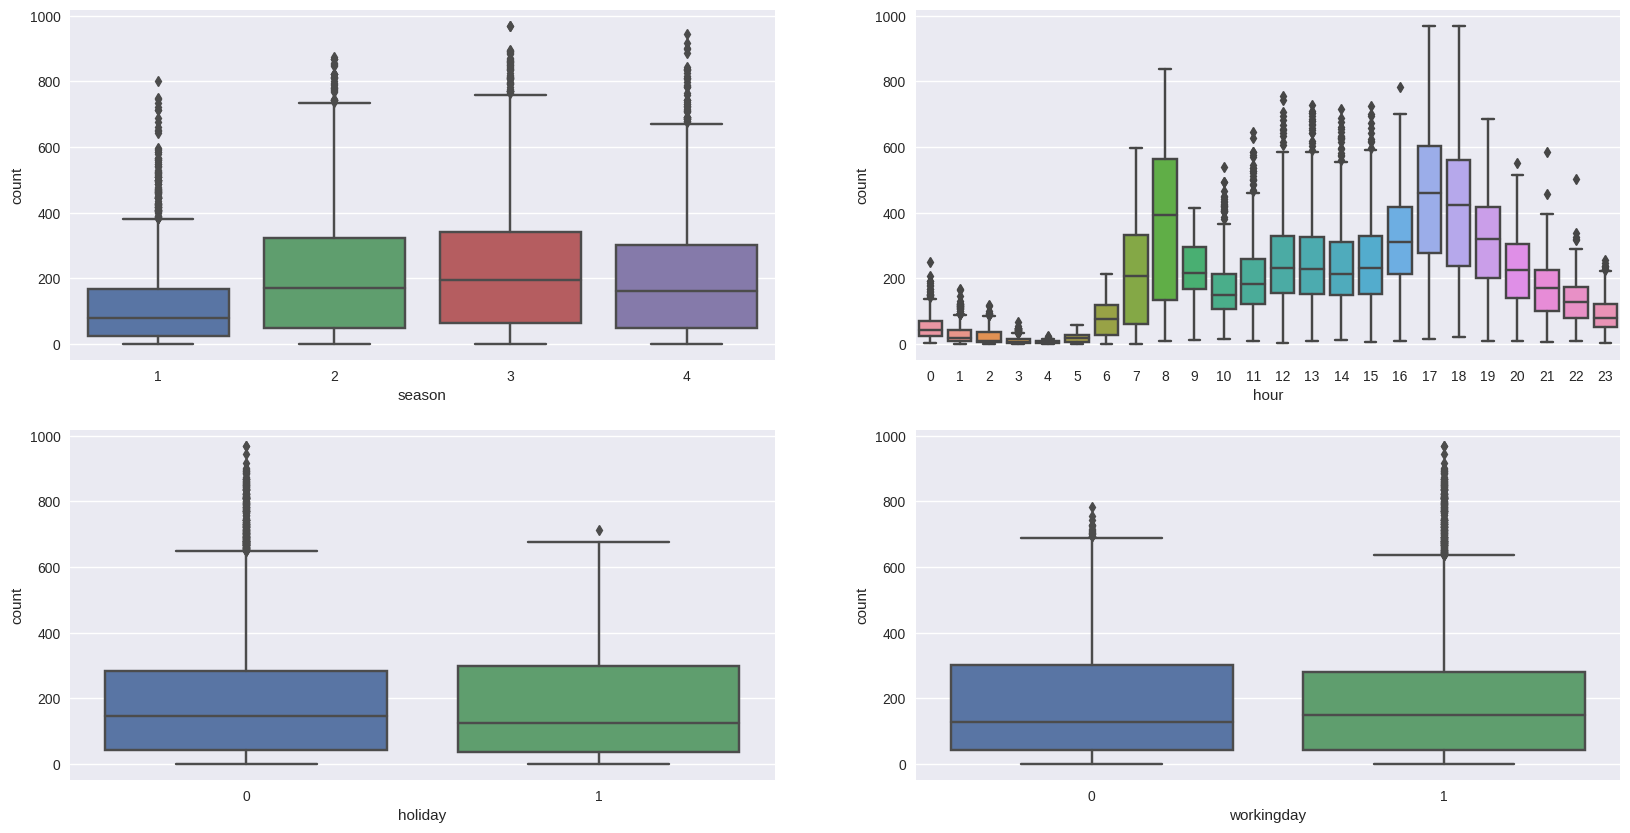

In [32]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)

sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="holiday",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

In [33]:
print('skewness value of count: ',train['count'].skew())
print('skewness value of windspeed: ',train['windspeed'].skew())
print('skewness value of humidity: ',train['humidity'].skew())

skewness value of count:  1.2387761265662802
skewness value of windspeed:  0.6049295277401318
skewness value of humidity:  -0.08207779349652145


In [34]:
copy=train.copy()
copy2=train.copy()
copy3=train.copy()
copy4=train.copy()

#dealing with outliers in windspeed
1)Clipping Method:

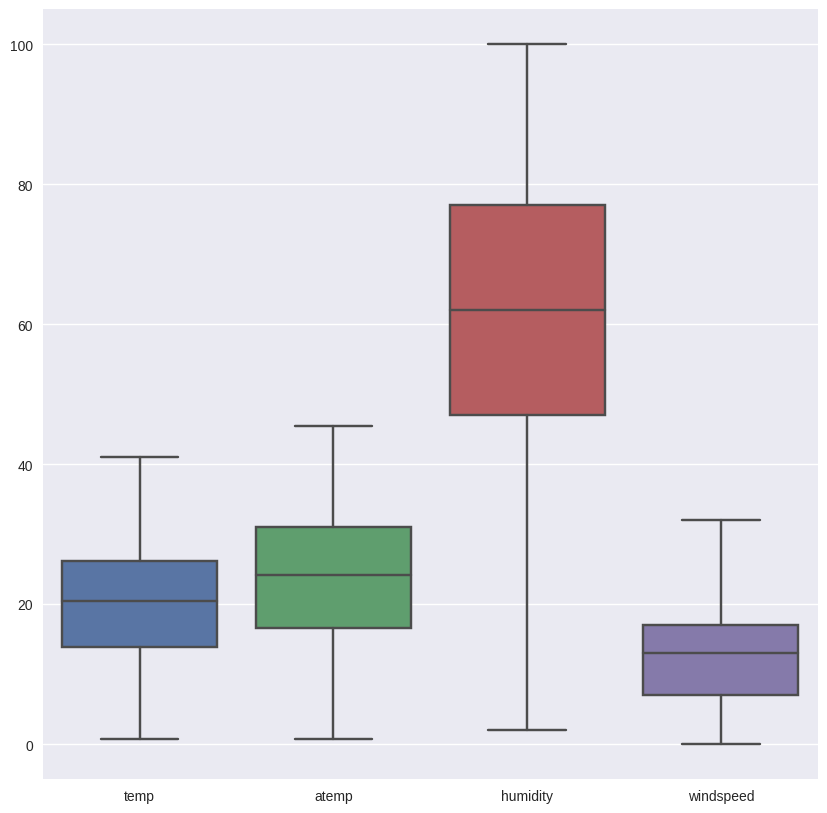

In [35]:
#Clipping Method:
num_features = ['temp', 'atemp', 'humidity', 'windspeed']
def clip(cliping):
    for col in cliping[num_features]:
        q1 = cliping[col].quantile(0.25)
        q3 = cliping[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        cliping[col] = cliping[col].clip(lower_bound, upper_bound)
    return cliping
copy = clip(copy)
sns.boxplot(data=copy[['temp',
       'atemp', 'humidity', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

## checking for distribution after treating outliers.

<ipython-input-36-699334be5283>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy['temp'], kde=True, color='#262223', ax=axes[0,0])
<ipython-input-36-699334be5283>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy['atemp'], kde=True, color='#262223', ax=axes[0,1])
<ipython-input-36-69933

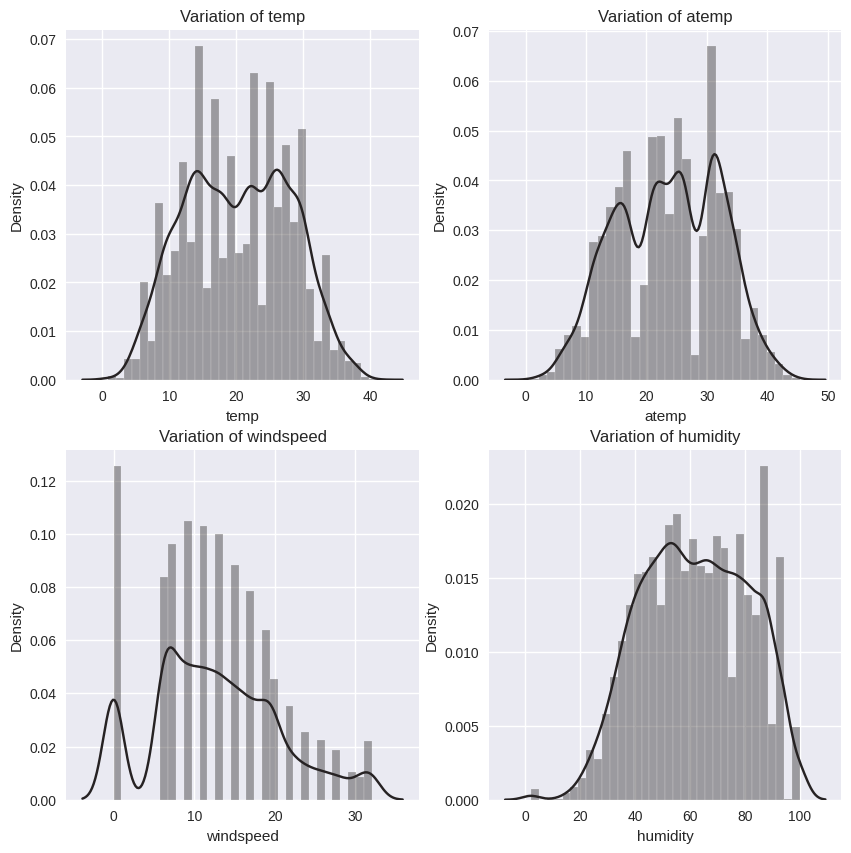

In [36]:
fig,axes=plt.subplots(2,2)
sns.distplot(copy['temp'], kde=True, color='#262223', ax=axes[0,0])
axes[0,0].set_title("Variation of temp")
sns.distplot(copy['atemp'], kde=True, color='#262223', ax=axes[0,1])
axes[0,1].set_title("Variation of atemp")
sns.distplot(copy['windspeed'], kde=True, color='#262223', ax=axes[1,0])
axes[1,0].set_title("Variation of windspeed")
sns.distplot(copy['humidity'], kde=True, color='#262223', ax=axes[1,1])
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)
plt.show()

 the features almost follow the normal distribution.
  windspeed is still skewed and there are alot of 0s values which indicate outliers

In [37]:
print('skewness value of windspeed: ',copy['windspeed'].skew())
print('skewness value of humidity: ',copy['humidity'].skew())

skewness value of windspeed:  0.36205039738689515
skewness value of humidity:  -0.07648141436167276


try use models to impute 0s

In [38]:
from sklearn.linear_model import LinearRegression


# Split the data into two sets: one with non-zero windspeed, and another with zero windspeed
train_wind_not_zero = copy2[copy2['windspeed'] != 0]
train_wind_zero = copy2[copy2['windspeed'] == 0]

# Create a list of features to use in the model
features = ['temp', 'humidity', 'season', 'weather']

# Fit a linear regression model to the data with non-zero windspeed
lr = LinearRegression()
lr.fit(train_wind_not_zero[features], train_wind_not_zero['windspeed'])

# Use the model to predict windspeed for the data with zero windspeed
predicted_wind = lr.predict(train_wind_zero[features])

# Replace the zero windspeed values with the predicted values
train_wind_zero['windspeed'] = predicted_wind

# Combine the two sets back into one dataframe
copy2 = pd.concat([train_wind_not_zero, train_wind_zero], axis=0)

# Check the result
print(copy2['windspeed'].describe())

count    8708.000000
mean       14.430249
std         6.757571
min         6.003200
25%         8.998100
50%        12.998000
75%        18.136689
max        56.996900
Name: windspeed, dtype: float64


<ipython-input-38-f9de23f72462>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_wind_zero['windspeed'] = predicted_wind


In [39]:
print('skewness value of windspeed: ',copy2['windspeed'].skew())
print('skewness value of humidity: ',copy2['humidity'].skew())

skewness value of windspeed:  1.1752042999507852
skewness value of humidity:  -0.08207779349652146


the difference between min and 25% is not high but between 75% and max is increased this means right skewed

<ipython-input-40-978524c4eff8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy2['windspeed'], kde=True, color='#262223')


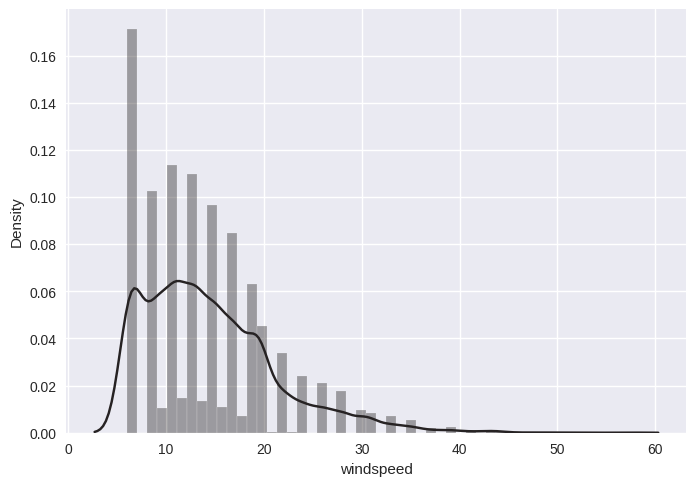

In [40]:
sns.distplot(copy2['windspeed'], kde=True, color='#262223')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestRegressor

# split data into rows with non-zero windspeed and rows with windspeed = 0
windspeed_nonzero = copy3[copy3['windspeed'] != 0]
windspeed_zero = copy3[copy3['windspeed'] == 0]

# define features and target variable
features = ['temp', 'atemp', 'humidity', 'season', 'weather', 'holiday', 'workingday']
target = 'windspeed'

# train model on non-zero windspeed data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(windspeed_nonzero[features], windspeed_nonzero[target])

# use trained model to predict windspeed for rows with windspeed = 0
windspeed_zero_pred = rf_model.predict(windspeed_zero[features])

# replace 0 values in windspeed column with predicted values
copy3.loc[copy3['windspeed'] == 0, 'windspeed'] = windspeed_zero_pred

In [42]:
# Check the result
print(copy3['windspeed'].describe())

count    8708.000000
mean       14.116699
std         6.939940
min         6.003200
25%         8.998100
50%        12.998000
75%        19.001200
max        56.996900
Name: windspeed, dtype: float64


still right skewed

<ipython-input-43-8677f96f62b7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy3['windspeed'], kde=True, color='#262223')


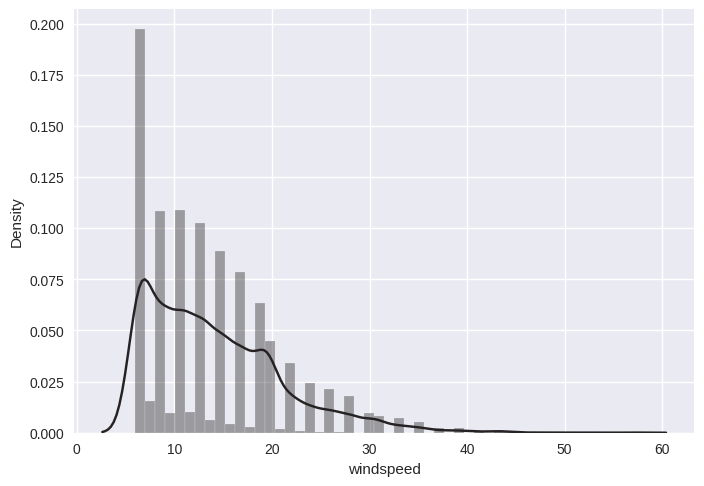

In [43]:
sns.distplot(copy3['windspeed'], kde=True, color='#262223')
plt.show()

In [44]:
print('skewness value of windspeed: ',copy3['windspeed'].skew())
print('skewness value of humidity: ',copy3['humidity'].skew())

skewness value of windspeed:  1.1698130943817817
skewness value of humidity:  -0.08207779349652145


In [45]:
from sklearn.neighbors import KNeighborsRegressor


windspeed_nonzero = copy4[copy4['windspeed'] != 0]
windspeed_zero = copy4[copy4['windspeed'] == 0]


features = ['temp', 'atemp', 'humidity', 'season', 'weather']
target = 'windspeed'

# train KNN model on non-zero windspeed data
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(windspeed_nonzero[features], windspeed_nonzero[target])

# use trained KNN model to predict windspeed for rows with windspeed = 0
windspeed_zero_pred = knn_model.predict(windspeed_zero[features])

# replace 0 values in windspeed column with predicted values
copy4.loc[copy4['windspeed'] == 0, 'windspeed'] = windspeed_zero_pred

In [46]:
print(copy4['windspeed'].describe())

count    8708.000000
mean       14.219261
std         6.893501
min         6.003200
25%         8.998100
50%        12.998000
75%        19.001200
max        56.996900
Name: windspeed, dtype: float64


<ipython-input-47-006560b26af0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy4['windspeed'], kde=True, color='#262223')


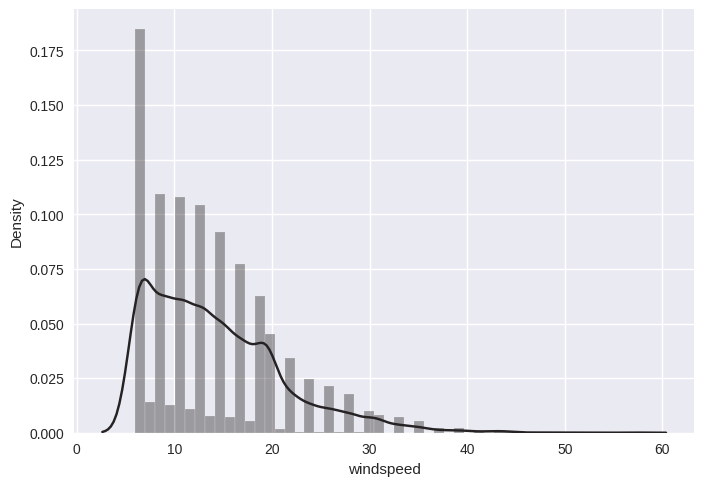

In [47]:
sns.distplot(copy4['windspeed'], kde=True, color='#262223')
plt.show()

<ipython-input-48-310b83ec4141>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transform, kde=True, color='#262223')


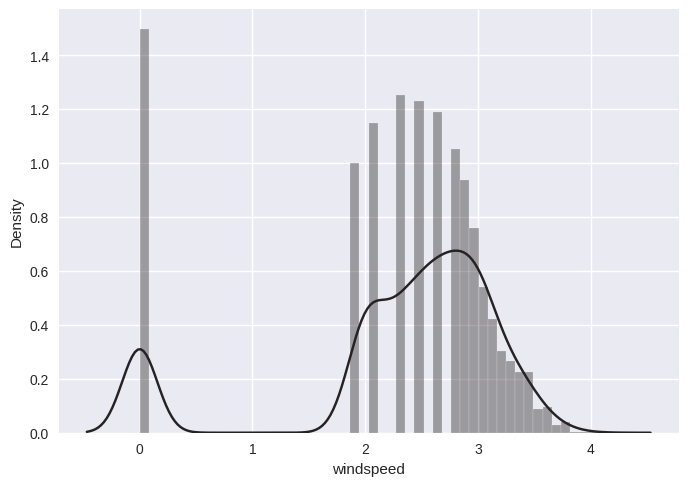

In [48]:
#try to make log 
transform= np.log1p(train['windspeed'])
sns.distplot(transform, kde=True, color='#262223')
plt.show()

#:)

trying to make cliping and then impute to windspped and clip to humidity

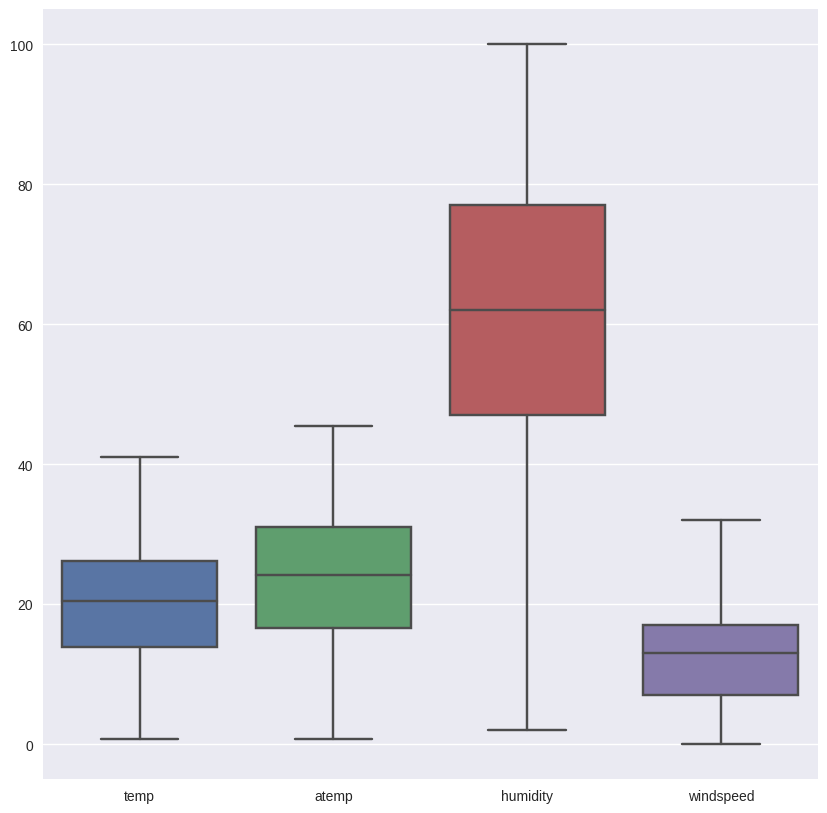

In [49]:
train = clip(train)
sns.boxplot(data=copy[['temp',
       'atemp', 'humidity', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [50]:
from sklearn.neighbors import KNeighborsRegressor


windspeed_nonzero = train[train['windspeed'] != 0]
windspeed_zero = train[train['windspeed'] == 0]


features = ['temp', 'atemp', 'humidity', 'season', 'weather']
target = 'windspeed'

# train KNN model on non-zero windspeed data
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(windspeed_nonzero[features], windspeed_nonzero[target])

# use trained KNN model to predict windspeed for rows with windspeed = 0
windspeed_zero_pred = knn_model.predict(windspeed_zero[features])

# replace 0 values in windspeed column with predicted values
train.loc[train['windspeed'] == 0, 'windspeed'] = windspeed_zero_pred

count    8708.000000
mean       14.114844
std         6.557288
min         6.003200
25%         8.998100
50%        12.998000
75%        19.001200
max        31.992500
Name: windspeed, dtype: float64


<ipython-input-51-f1aec7afaaf6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['windspeed'], kde=True, color='#262223')


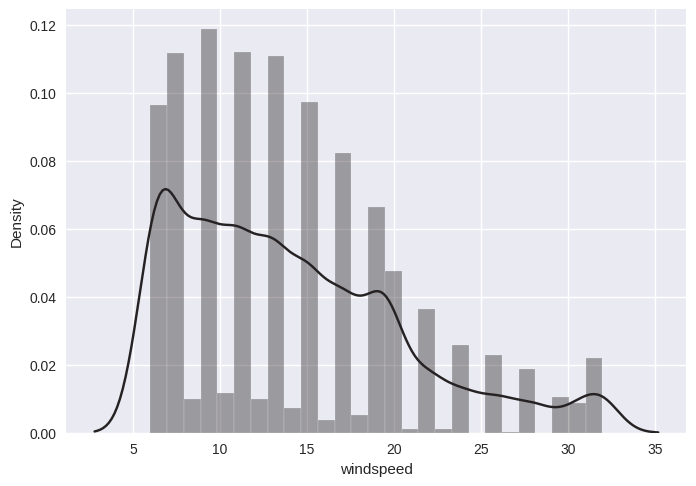

In [51]:
print(train['windspeed'].describe())
sns.distplot(train['windspeed'], kde=True, color='#262223')
plt.show()

not bad

#Correlation 

<Axes: >

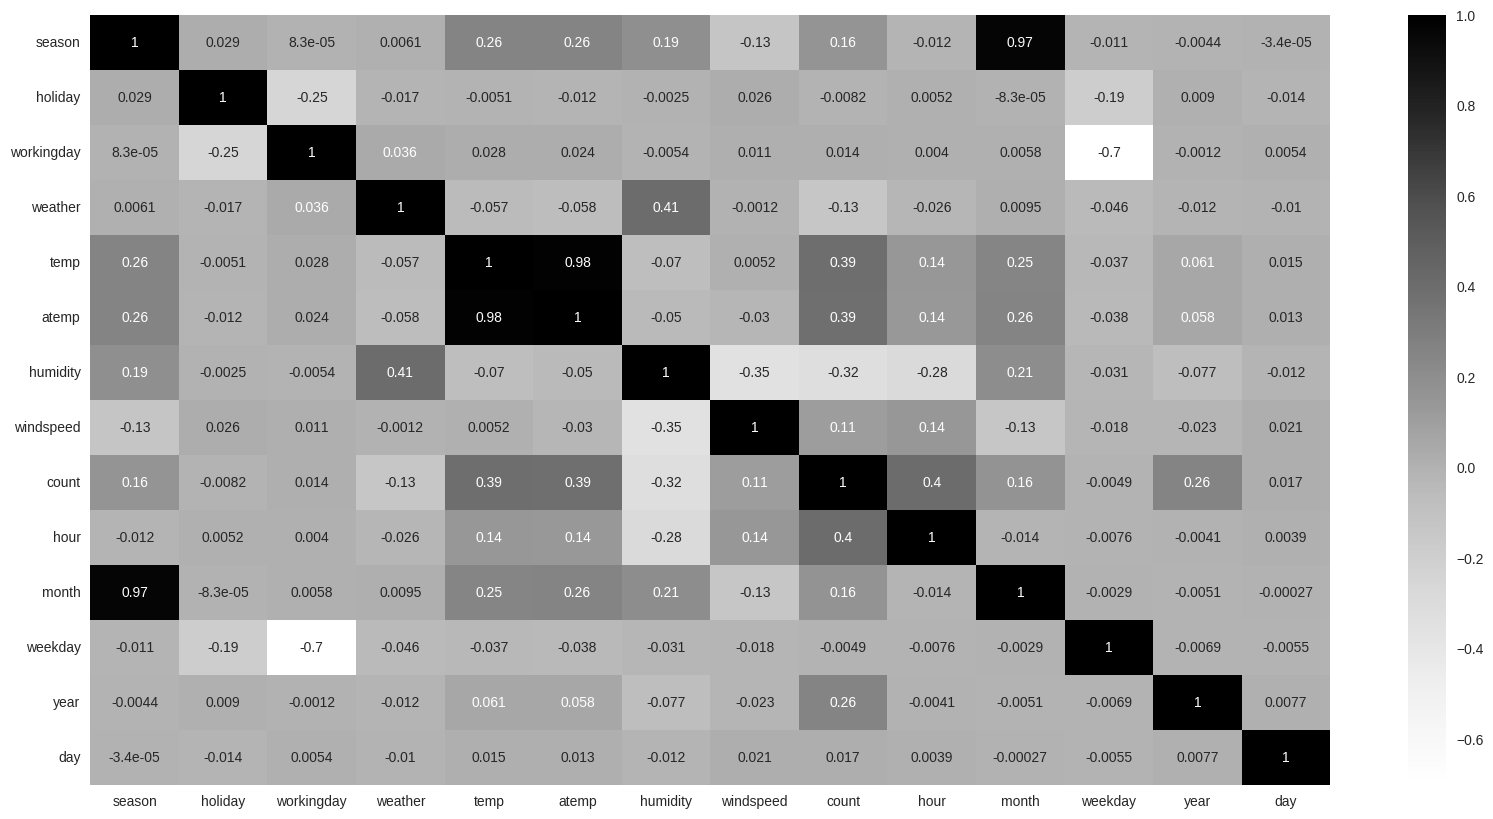

In [52]:

fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(),annot=True, cmap='Greys')

"atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other ->multicollinearity drop atemp so it will drop from train

In [53]:
train.drop(columns=['atemp'],axis=1,inplace=True)

In [54]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,month,weekday,year,day
2815,3,0,1,1,27.88,83.0,6.0032,35,5,7,2,2011,6
8695,3,0,0,1,36.90,39.0,19.9995,450,16,8,5,2012,4
8406,3,0,1,1,32.80,41.0,16.9979,276,15,7,2,2012,11
1543,2,0,0,2,14.76,93.0,7.0015,5,4,4,6,2011,10
4952,4,0,0,1,13.12,45.0,16.9979,200,10,11,5,2011,19


#dealing with outliers in target
As we knew,count distrabution is right skewed

<ipython-input-55-507f36842848>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mins_mean, kde=True, color='#262223')


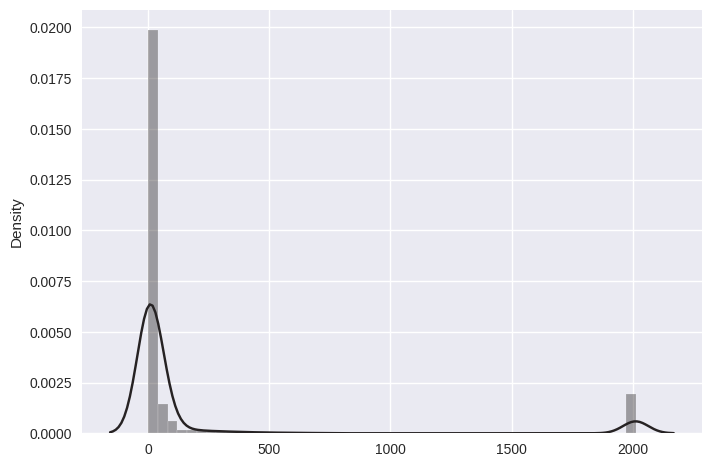

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,month,weekday,year,day
2815,3,0,1,1,27.88,83.0,6.0032,35,5,7,2,2011,6
8695,3,0,0,1,36.90,39.0,19.9995,450,16,8,5,2012,4
8406,3,0,1,1,32.80,41.0,16.9979,276,15,7,2,2012,11
1543,2,0,0,2,14.76,93.0,7.0015,5,4,4,6,2011,10
4952,4,0,0,1,13.12,45.0,16.9979,200,10,11,5,2011,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,1,6.56,47.0,11.0014,38,2,1,5,2012,14
5191,4,0,0,1,11.48,61.0,19.0012,149,9,12,5,2011,10
5390,4,0,0,1,11.48,48.0,16.9979,234,16,12,6,2011,18
860,1,0,0,1,15.58,17.0,31.9925,22,7,2,5,2011,19


In [55]:
# find the rows where the "count" values are within 3 standard deviations of the mean. 
#These rows are retained in the "train" dataframe, while the rows with "count"
# values outside this range are filtered out.

mins_mean = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())] 

sns.distplot(mins_mean, kde=True, color='#262223')
plt.show()
mins_mean

In [56]:
train.shape

(8708, 13)

this means will remove 117 row not prefered

try to make transformation

<ipython-input-57-1f97e1cba35d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(train['count']),kde=True, ax=axs[0])
<ipython-input-57-1f97e1cba35d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(train['count']),kde=True, ax=axs[1])
<ipython-input-57-1f97e1cba35d>:6: UserWarn

<Axes: xlabel='count', ylabel='Density'>

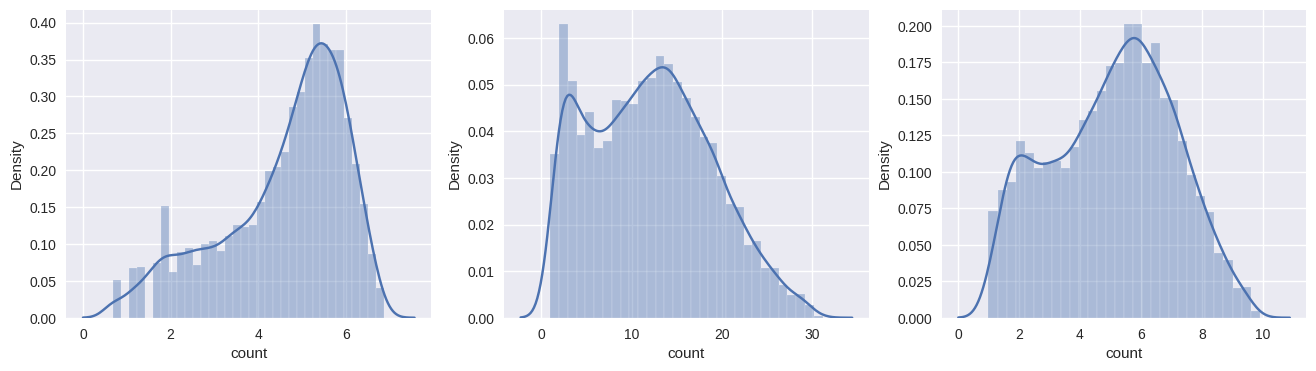

In [57]:
# checking the best transformation for our target variable
fig, axs = plt.subplots(1,3, figsize=(16,4))

sns.distplot(np.log1p(train['count']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(train['count']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(train['count']),kde=True, ax=axs[2])

use a square root transformation as it transformed the variable into a well-distributed form.


In [58]:
print('mean:',np.sqrt(train['count']).mean())
print('median:',np.sqrt(train['count']).median())

mean: 12.109922154556514
median: 12.041594578792296


after using square root mean is the same median ,this indication of normality

In [59]:
train['count']=np.sqrt(train['count'])
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,month,weekday,year,day
2815,3,0,1,1,27.88,83.0,6.0032,5.916080,5,7,2,2011,6
8695,3,0,0,1,36.90,39.0,19.9995,21.213203,16,8,5,2012,4
8406,3,0,1,1,32.80,41.0,16.9979,16.613248,15,7,2,2012,11
1543,2,0,0,2,14.76,93.0,7.0015,2.236068,4,4,6,2011,10
4952,4,0,0,1,13.12,45.0,16.9979,14.142136,10,11,5,2011,19


#encoding
remove weekday 
label encode to year
one hot encoding for categorical such as season and weather don't forgot there is a one record for weather in condition 4 

In [60]:
train['year']=train['year'].map({2011:0, 2012:1})
train = pd.get_dummies(train,columns=['season'],prefix='season')
train = pd.get_dummies(train,columns=['weather'],prefix='weather')
train.head()

,holiday,workingday,temp,humidity,windspeed,count,hour,month,weekday,year,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
2815,0,1,27.88,83.0,6.0032,5.916080,5,7,2,0,6,0,0,1,0,1,0,0,0
8695,0,0,36.90,39.0,19.9995,21.213203,16,8,5,1,4,0,0,1,0,1,0,0,0
8406,0,1,32.80,41.0,16.9979,16.613248,15,7,2,1,11,0,0,1,0,1,0,0,0
1543,0,0,14.76,93.0,7.0015,2.236068,4,4,6,0,10,0,1,0,0,0,1,0,0
4952,0,0,13.12,45.0,16.9979,14.142136,10,11,5,0,19,0,0,0,1,1,0,0,0


In [61]:
train.describe()

,holiday,workingday,temp,humidity,windspeed,count,hour,month,weekday,year,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.029169,0.680983,20.269104,61.815572,14.114844,12.109922,11.547772,6.525264,3.019063,0.501608,9.959463,0.245751,0.251952,0.251148,0.251148,0.662609,0.258153,0.079123,0.000115
std,0.168289,0.466122,7.788428,19.275763,6.557288,6.703708,6.922209,3.434726,1.999737,0.500026,5.465667,0.430556,0.434159,0.433699,0.433699,0.472847,0.437644,0.269946,0.010716
min,0.000000,0.000000,0.820000,2.000000,6.003200,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,47.000000,8.998100,6.557439,6.000000,4.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,12.041595,12.000000,7.000000,3.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.240000,77.000000,19.001200,16.881943,18.000000,10.000000,5.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,41.000000,100.000000,31.992500,31.144823,23.000000,12.000000,6.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
train.drop(['weekday'],axis=1,inplace=True)

#modeling
here we are 

In [63]:
def preprocessing(data):

  data.datetime = pd.to_datetime(data.datetime)

  data['hour']=data.datetime.dt.hour
  data['month']=data.datetime.dt.month

  data['year']=data.datetime.dt.year
  data['day']=data.datetime.dt.day
  data.drop(columns=['datetime'],axis=1,inplace=True)
  data = clip(data)

  windspeed_zero = data[data['windspeed'] == 0]


  features = ['temp', 'atemp', 'humidity', 'season', 'weather']

# use trained KNN model to predict windspeed for rows with windspeed = 0
  windspeed_zero_pred = knn_model.predict(windspeed_zero[features])

# replace 0 values in windspeed column with predicted values
  data.loc[data['windspeed'] == 0, 'windspeed'] = windspeed_zero_pred
  data.drop(columns=['atemp'],axis=1,inplace=True)
  
  data['year']=data['year'].map({2011:0, 2012:1})
  data = pd.get_dummies(data,columns=['season'],prefix='season')
  data = pd.get_dummies(data,columns=['weather'],prefix='weather')

  return data

In [64]:
x_train=train.drop(['count'],axis=1)
y_train=train['count']
x_val=preprocessing(x_val)
y_val=np.sqrt(y_val)



In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(8708, 17)
(8708,)
(2178, 16)
(2178,)


different in shape add weather 4

In [66]:
x_train.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'hour',
       'month', 'year', 'day', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [67]:
x_val['weather_4']=0
x_val.shape

(2178, 17)

there are difference in range numbers in temp , humidity,windspped,count so we need to scale

 it is recommended to scale other variables in the dataset if you plan to use the square root transformed variable as a predictor in a machine learning model. This can be done using methods such as StandardScaler,

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

#linear regression
 MSLE which is a commonly used loss function in machine learning for regression problems where the target variable has a wide range of values. It measures the difference between the predicted and actual values of the target variable on a logarithmic scale.

In [69]:
rg=LinearRegression()

rg.fit(x_train,y_train)
y_pred = rg.predict(x_val)
print(rg.score(x_train, y_train)*100)
print(rg.score(x_val, y_val)*100)

48.0753619031402
48.22846434545558


to calc RMSLE should reverse transformation on Y

In [70]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

y_pred_reverse = np.power(y_pred, 2)
y_val_reverse = np.power(y_val, 2)

print('MSLE:', mean_squared_log_error(y_val_reverse, y_pred_reverse, squared=False))

MSLE: 1.0667589882015271


In [71]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
y_val_reverse = np.power(y_val, 2)
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_val)
    y_pred_reverse = np.power(test_pred, 2)
    

    rmsle.append(mean_squared_log_error(y_val_reverse, y_pred_reverse, squared=False))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   


In [72]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.330710
1,AdaBoostRegressor,0.726698
2,BaggingRegressor,0.346838
3,SVR,0.908672
4,KNeighborsRegressor,0.876267


random forest has the leastin MSLE
we choose random forest 

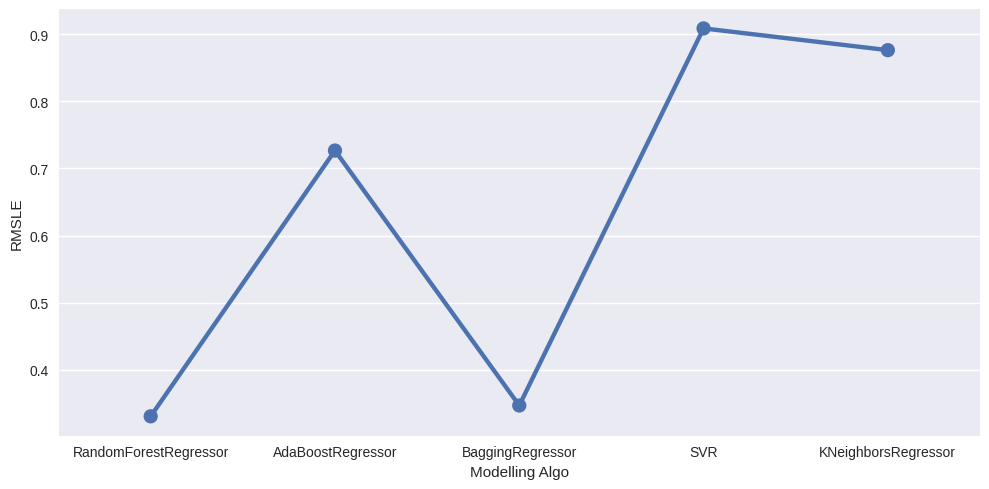

In [73]:
sns.catplot(x='Modelling Algo', y='RMSLE', data=rmsle_frame, kind='point', height=5, aspect=2)
plt.show()

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]})

In [75]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [76]:
y_pred = grid_search.predict(x_val)

y_pred_reverse = np.power(y_pred, 2)
y_val_reverse = np.power(y_val, 2)

print('MSLE:', mean_squared_log_error(y_val_reverse, y_pred_reverse, squared=False))

MSLE: 0.47393129077898954


nice

In [77]:
#for KNN
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN classifier object
knn = KNeighborsRegressor()

# Create a grid search object
knn_clf = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the data
knn_clf.fit(x_train, y_train)

# Print the best hyperparameters and score
print("Best parameters: ", knn_clf.best_params_)
print("Best score: ", knn_clf.best_score_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best score:  0.6853423343464053


In [78]:
y_pred = knn_clf.predict(x_val)

y_pred_reverse = np.power(y_pred, 2)
y_val_reverse = np.power(y_val, 2)

print('MSLE:', mean_squared_log_error(y_val_reverse, y_pred_reverse, squared=False))

MSLE: 0.8225520158869254


Random forest is better

In [79]:
test=pd.read_csv('/content/drive/MyDrive/ml2/test.csv')
datetime=test['datetime']

test=preprocessing(test)
test = scaler.transform(test)

y_pred = grid_search.predict(test)
y_pred_reverse = np.power(y_pred, 2)

kaggle = pd.DataFrame({'datetime': datetime, 'count': y_pred_reverse})
kaggle.to_csv('Bike_shareing.csv', index=False)

Score in kaggle: 0.61155



#feature importance

In [80]:
rf = RandomForestRegressor(random_state=42)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
y_pred_reverse = np.power(y_pred, 2)
print('MSLE:', mean_squared_log_error(y_val_reverse, y_pred_reverse, squared=False))

MSLE: 0.33248643792441135


try to sumbit with this score

In [81]:
y_pred = rf.predict(test)
y_pred_reverse = np.power(y_pred, 2)

kaggle = pd.DataFrame({'datetime': datetime, 'count': y_pred_reverse})
kaggle.to_csv('Bike_shareing.csv', index=False)

Score: 0.46309 :)

In [82]:
importances = rf.feature_importances_

importances

array([2.05113514e-03, 4.41540261e-02, 9.15386543e-02, 2.54965218e-02,
       9.19137683e-03, 6.96244337e-01, 3.42140292e-02, 6.13746533e-02,
       1.08886265e-02, 6.55654319e-03, 9.16141406e-04, 6.81154176e-04,
       1.04734758e-03, 1.82125473e-03, 9.72257959e-04, 1.28514714e-02,
       4.69652508e-07])

In [83]:
x=train[['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'hour',
       'month', 'year', 'day', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4']]

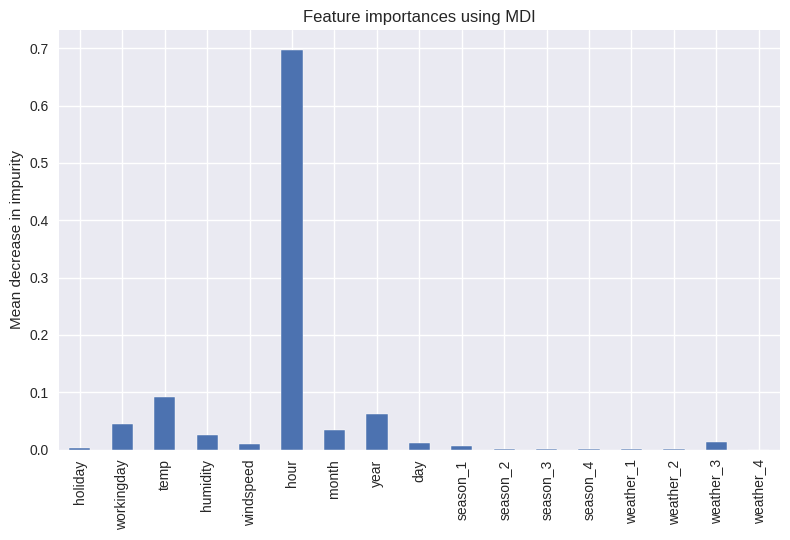

In [84]:

forest_importances = pd.Series(importances, index=x.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [85]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import numpy as np


# Define models
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
lr = LinearRegression()
svr = SVR(kernel='rbf', C=100, gamma='auto')

# Train individual models
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
svr.fit(x_train, y_train)

# Make predictions on validation set
rf_pred = rf.predict(x_val)
gb_pred = gb.predict(x_val)
svr_pred = svr.predict(x_val)

rf_pred_reverse = np.power(rf_pred, 2)
print('MSLE rf:', mean_squared_log_error(y_val_reverse, rf_pred_reverse, squared=False))
gb_pred_reverse = np.power(gb_pred, 2)
print('MSLE gb:', mean_squared_log_error(y_val_reverse, gb_pred_reverse, squared=False))
svr_pred_reverse = np.power(svr_pred, 2)
print('MSLE svr:', mean_squared_log_error(y_val_reverse, svr_pred_reverse, squared=False))

# Combine models using VotingRegressor
voting_reg = VotingRegressor([('rf', rf), ('gb', gb), ('svr', svr)])
voting_reg.fit(x_train, y_train)

# Evaluate ensemble model on validation set
voting_pred = voting_reg.predict(x_val)

vt_pred = np.power(voting_pred, 2)
print('MSLE voting_pred:', mean_squared_log_error(y_val_reverse, vt_pred, squared=False))

MSLE rf: 0.34979767811733825
MSLE gb: 0.33009343256246715
MSLE svr: 0.7837433074328752
MSLE voting_pred: 0.4199286360570352


In [86]:
y_pred = voting_reg.predict(test)
y_pred_reverse = np.power(y_pred, 2)

kaggle = pd.DataFrame({'datetime': datetime, 'count': y_pred_reverse})
kaggle.to_csv('Bike_shareing.csv', index=False)

Score: 0.56245

In [87]:
gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_val)
gb_pred_reverse = np.power(gb_pred, 2)
print('MSLE gb:', mean_squared_log_error(y_val_reverse, gb_pred_reverse, squared=False))


MSLE gb: 0.33009343256246715


In [88]:
y_pred = gb.predict(test)
y_pred_reverse = np.power(y_pred, 2)

kaggle = pd.DataFrame({'datetime': datetime, 'count': y_pred_reverse})
kaggle.to_csv('Bike_shareing.csv', index=False)

#score increased from Score: 0.46309 to Score: 0.45822